<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/ElectricMachines_BasicPrinciple_ZeroRotorFrequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Basic Operating Principle of Electric Machines: Zero Rotor Frequency</h1></b>

Dr. Bingsen Wang

7/30/2024
</center>

#Python Code
The Python code illustrates the basic principle of producing electromagnetic torque by wound-rotor electric machines.

0
0
50
100
150
200
250
300
350
400
450
500
550
0


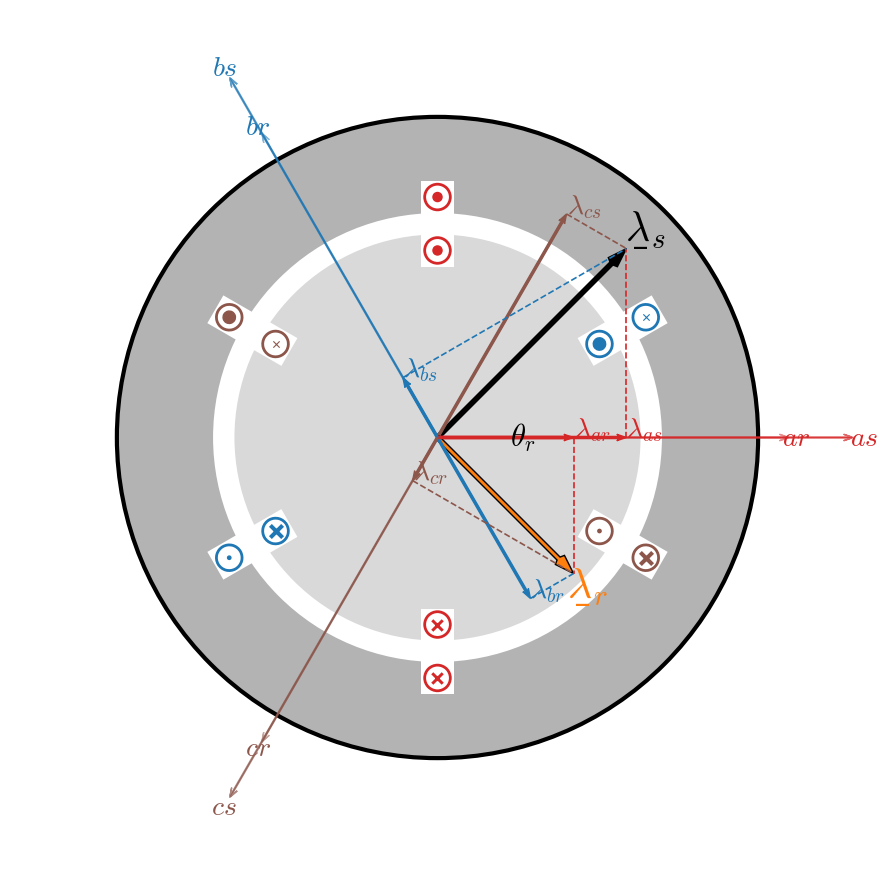

In [41]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array
from numpy import heaviside as hs
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib import animation,transforms,colors
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def f_abc(t,A,w,theta): # A: amplitude; w: frequency; theta: phase angle
    return A*array([cos(w*t+theta-k*2*pi/3) for k in range(3)])

def abc2ab(abc): #Clarke transformation, abc to alpha-beta
  return sum(2/3*abc[k]*exp(1j*k*2*pi/3) for k in range(3))

def axis_reset(ax): #clear axis for redrawing
  xy=ax.axis(); ax.cla(); ax.axis('off'); ax.set(xlim=xy[:2],ylim=xy[-2:])
  return

def draw_abc_axes(ax,theta,l,labels,colors,alpha=1,width=.005,zorder=2):
  for k in range(3):
    rot = transforms.Affine2D().rotate(2*pi/3*k+theta)+ax.transData
    ax.add_patch(fa(0,0,l,0,width=width,head_width=.06,overhang=.8,color=colors[k],
                    alpha=alpha,transform=rot,zorder=zorder))
    ax.text(l*1.05,0,labels[k],color=colors[k],size=20,transform=rot,ha='center',va='center')
  return

def draw_coductors_in_slots(ax,r,theta,clst,stator=1): #stator=-1 for rotor
  for k in range(6):
    rot = transforms.Affine2D().rotate(pi/3*k+theta)+ax.transData
    ax.add_patch(mp.Rectangle((r-.2+.1*stator,-.15),.4,.3,fc=clst[-1],transform=rot)) #slots
    ax.add_patch(mp.Circle((r+.15*stator,0),.12,color=clst[(1-k)%3],fc='none',lw=2,
                           transform=rot)) #conductors
  return
def draw_current_polarities(ax,r,clst,theta=0,abc=[1,1,1]): #current polarities
  for k in range(3):
    rot = transforms.Affine2D().rotate(2*pi/3*k+pi/2+(1-hs(abc[k],0))*pi+theta)+ax.transData
    ax.add_patch(mp.Circle((r,0),.06*abs(abc[k]),color=clst[k],transform=rot)) #dot
    rot = transforms.Affine2D().rotate(2*pi/3*k+3*pi/2+(1-hs(abc[k],0))*pi+theta)+ax.transData
    ax.scatter(r,0,s=80*abs(abc[k]),marker='x',lw=3*abs(abc[k]),color=clst[k],transform=rot)#cross
  return

def draw_stator(ax,ord,ird,clst,alpha=1): #stator with axes
  """ord: outter radius; ird: inner radius"""
  ax.add_patch(mp.Circle((0,0),ord,color=clst[-2],lw=3,fc=(.7,.7,.7,1),alpha=alpha))
  ax.add_patch(mp.Circle((0,0),ird,color=clst[-2],lw=0,fc=clst[-1],alpha=alpha))
  draw_coductors_in_slots(ax,ird,pi/6,clst)
  return

def draw_rotor(ax,r,clst,theta=0,alpha=1,abc=[1,1,1]): #rotor w/ rotor/stator axes
  draw_abc_axes(ax,theta,3.2,['$ar$','$br$','$cr$'],clst,alpha=.5) #rotor axes
  draw_abc_axes(ax,0,3.8,['$as$','$bs$','$cs$'],clst,width=.01,alpha=.7) #stator axes
  ax.add_patch(mp.Circle((0,0),r,color=clst[-2],lw=0,fc=(.85,.85,.85,.8),alpha=alpha))
  draw_coductors_in_slots(ax,r,pi/6+theta,clst,stator=-1) #rotor conductors in slots
  draw_current_polarities(ax,r-.15,clst,theta,abc) #normalized rotor currents
  ax.add_patch(mp.Arc((0,0),1.2,1.2,theta2=theta*180/pi,color=clst[-2]))
  rot = transforms.Affine2D().rotate((theta%(2*pi))/2)+ax.transData
  ax.text(.8,0,r'$\theta_r$',size=22,transform=rot,va='center',ha='center')
  return

def draw_vectors(ax,abc,ab,clst,theta=0,vns=['','','','']):
  rot = transforms.Affine2D().rotate(theta)+ax.transData
  as1 = {'width':.04,'length_includes_head':True,'overhang':-.1} #arr style
  as2 = {'width':.02,'length_includes_head':True,'overhang':.3} #arr style
  ax.add_patch(fa(0,0,ab.real,ab.imag,**as1,color=clst[-1],ec='k',lw=1)) #vector ab
  ax.text(ab.real*1.1,ab.imag*1.1,vns[-1],size=30,color=clst[-1],va='center',ha='center')
  arc = mp.FancyArrowPatch((-1.3,.3),(-1.3,-.3),connectionstyle="arc3,rad=.3",
     mutation_scale=15,color='k',transform=rot)
  if theta != 0:
    ax.add_patch(arc)
    ax.text(-1.2,0,'$T_{em}$',size=24,transform=rot,va='center',ha='center')
  for k in range(3):
    rot = transforms.Affine2D().rotate(theta+k*2*pi/3)+ax.transData
    ax.add_patch(fa(0,0,abc[k],0,**as2,color=clst[k],transform=rot)) #vector abc
    ax.plot([abc[k]*cos(k*2*pi/3+theta),ab.real],[abc[k]*sin(k*2*pi/3+theta),ab.imag],
            '--',color=clst[k],lw=1.2)
    ax.text(abc[k],0,vns[k],size=20,color=clst[k],transform=rot)
  return

#parameters
Nfps = 600 #number of frames
ord_s,ird_s,ord_r = 3,2.1,1.9 #stator outter/inner radi, rotor outter radius
fe =1 #frequency
Lmds,fs,phi_s=2.5,fe,pi/4 #stator flux amplitude,frequency,phase
Lmdr,fsl,phi_r=1.8,0*fe,phi_s-pi/2 #rotor flux amplitude, slip frequency,omega,phase
t=linspace(0,1/fe,Nfps)
lmd_s_abc = f_abc(t,Lmds,2*pi*fs,phi_s) #stator flux linkages
lmd_s_ab = abc2ab(lmd_s_abc) #stator flux vector
lmd_r_abc = f_abc(t,Lmdr,2*pi*fsl,phi_r) #rotor flux linkages
lmd_r_ab = abc2ab(lmd_r_abc)*exp(1j*2*pi*(fs-fsl)*t) #rotor flux vector

#plotting
xylim = [[-4,4] for _ in range(2)]
clst=['tab:red','tab:blue','tab:brown','tab:purple','tab:orange','tab:green','k','w'] #colors light bg
fig = plt.figure(figsize=(9,9))
axs,lines = [[] for _ in range(2)]
for k in range(2):
  axs.append(fig.add_axes((.025,.025,.95,.95),xlim=xylim[0],ylim=xylim[1],fc='none'))
  axs[k].axis('off')

# animation function. This is called sequentially
def animate(i):
  # i=270
  if i%50==0: print(i)
  axis_reset(axs[1]) #clear axis
  draw_current_polarities(axs[1],ird_s+.15,clst,abc=lmd_s_abc[:,i]/Lmds) #stator currents
  draw_rotor(axs[1],ord_r,clst,theta=2*pi*(fs-fsl)*t[i],abc=lmd_r_abc[:,i]/Lmdr)
  draw_vectors(axs[1],lmd_s_abc[:,i],lmd_s_ab[i],clst[:3]+[clst[-2]],
               vns=[r'$\lambda_{as}$',r'$\lambda_{bs}$',r'$\lambda_{cs}$',
                    r'$\lambda\underbar_s$']) #stator vectors
  draw_vectors(axs[1],lmd_r_abc[:,i],lmd_r_ab[i],clst[:3]+[clst[4]],theta=2*pi*(fs-fsl)*t[i],
               vns=[r'$\lambda_{ar}$',r'$\lambda_{br}$',r'$\lambda_{cr}$',
                    r'$\lambda\underbar_r$']) #rotor vectors
  return
draw_stator(axs[0],ord_s,ird_s,clst)
anim = animation.FuncAnimation(fig, animate, frames=Nfps)
anim.save("ElectricMachine_BasicPrinciple_SynchronousMotoring.mp4", writer=animation.FFMpegWriter(fps=30),dpi = 200)